In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
f=open('./科比数据/data.csv')#路径有中文读取错误
raw=pd.read_csv(f)
print(raw.shape)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
raw.head()

(30697, 25)


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [62]:
#label的缺失数据作为测试
kobe=raw[pd.notnull(raw.shot_made_flag)]
print(kobe.shape)

(25697, 25)


Text(0.5,1,'kobe.lat,kobe.lon')

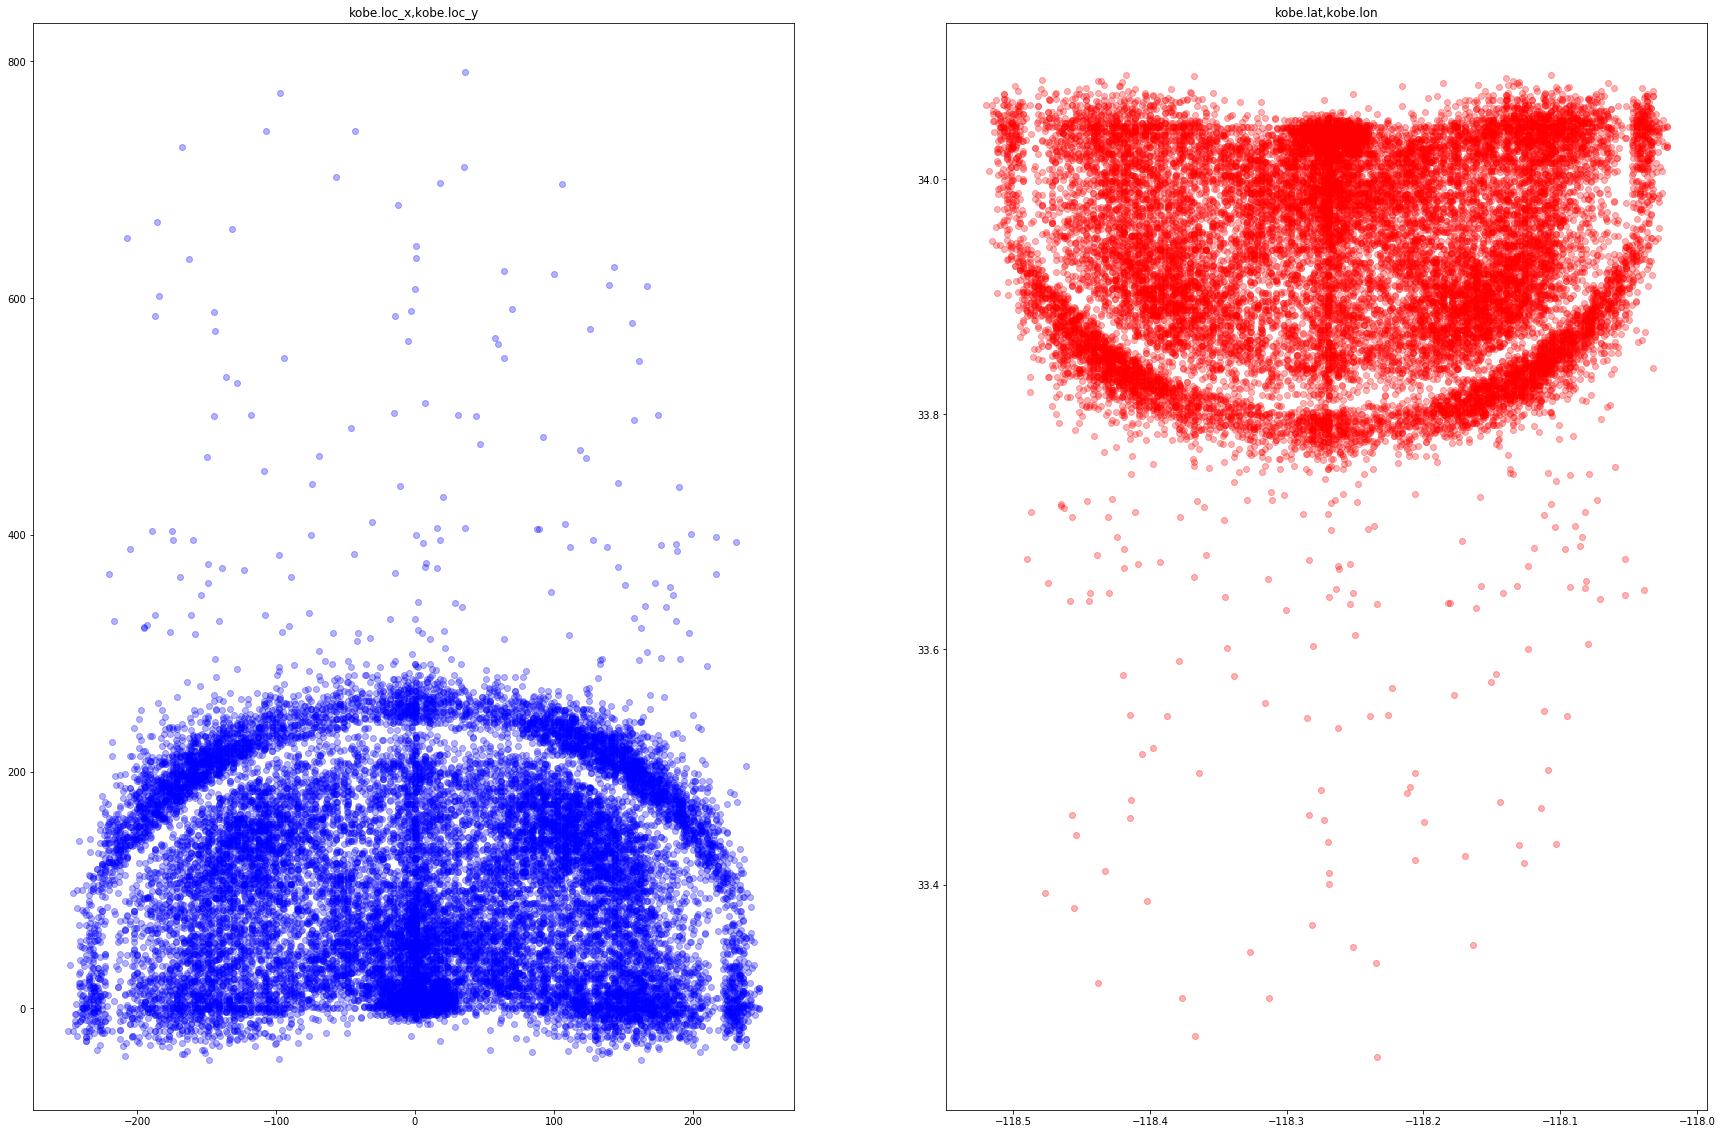

In [63]:
#开始理解数据列
alpha=0.3#点透明度
plt.figure(figsize=(30,20))#画图区域
plt.subplot(1,2,1)
plt.scatter(kobe.loc_x,kobe.loc_y,c='b',alpha=alpha)
plt.title('kobe.loc_x,kobe.loc_y')

plt.subplot(1,2,2)
plt.scatter(kobe.lon,kobe.lat,c="r",alpha=alpha)
plt.title('kobe.lat,kobe.lon')

In [64]:
raw['dist']=np.sqrt(raw.loc_x**2+raw.loc_y**2)

#loc_x_zero = raw['loc_x'] == 0
#print (loc_x_zero)
raw['angle'] = np.array([0]*len(raw))
#print([0]*len(raw))生成全0的行向量，并改为np。array格式
raw['angle'][raw.loc_x!=0]=np.arctan(raw.loc_y[raw.loc_x!=0]/raw.loc_x[raw.loc_x!=0])
#raw['angle'][~loc_x_zero] = np.arctan(raw['loc_y'][~loc_x_zero] / raw['loc_x'][~loc_x_zero])
#对不在边线的点求反三角函数计算角度
#print(raw['angle'])
raw.angle[raw.loc_x==0]=np.pi /2
print(raw['angle'])  #x=0的位置即y轴点，给角度90度

0        0.407058
1       -0.000000
2       -0.928481
3        0.903063
4        1.570796
5        0.075717
6        1.570796
7        1.535097
8       -1.029016
9       -1.312685
10      -1.194644
11       0.809587
12      -1.023719
13      -0.042528
14      -1.115696
15       1.258450
16       1.570796
17      -1.093090
18      -0.633733
19       1.570796
20       1.549966
21       0.758585
22      -1.426355
23      -0.942397
24      -0.940115
25       1.570796
26      -1.283088
27      -0.793528
28       1.114109
29       1.536327
           ...   
30667    1.412141
30668   -1.467561
30669    0.300552
30670   -0.212938
30671    1.570796
30672    0.553534
30673    0.000000
30674    1.074374
30675   -1.015533
30676   -0.000000
30677   -0.902054
30678    0.851966
30679    1.570796
30680    1.570796
30681   -1.501940
30682   -0.614663
30683    1.566167
30684   -0.747578
30685    1.257469
30686    1.400421
30687    1.190290
30688   -0.450869
30689   -1.553125
30690   -0.724441
30691    1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [65]:
raw['remaining_time']=raw.minutes_remaining*60+raw.seconds_remaining

In [66]:
print(kobe.shot_type.unique())#特征类别
print(kobe.shot_type.value_counts())#特征各类别总和

['2PT Field Goal' '3PT Field Goal']
2PT Field Goal    20285
3PT Field Goal     5412
Name: shot_type, dtype: int64


In [67]:
kobe.season.unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [68]:
kobe.season=kobe.season.apply(lambda x:int(x.split('-')[1]))#数据处理将带有特殊字符数据转为int
kobe.season.unique()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0], dtype=int64)

In [69]:
pd.DataFrame({'matchup':kobe.matchup,'opponent':kobe.opponent})#取两列特征构成一个字典样式的dataframe

,matchup,opponent
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR
6,LAL @ POR,POR
8,LAL @ POR,POR
9,LAL @ POR,POR
10,LAL @ POR,POR
11,LAL vs. UTA,UTA


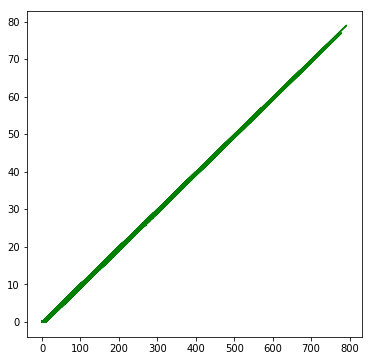

In [76]:
plt.figure(figsize=(6,6))
#plt.scatter(raw.dist, raw.shot_distance, marker='+',color='blue')
plt.plot(raw.dist,raw.shot_distance,c="g")
#图中表明两个属性成线性相关性，只能取其中一个属性使用

In [78]:
gs = kobe.groupby('shot_zone_area')#以该列数据为key，对其他列对应计算
print (kobe['shot_zone_area'].value_counts())
print (len(gs))
#该属性有六个类别

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64
6


Text(0.5,1,'shot_zone_range')

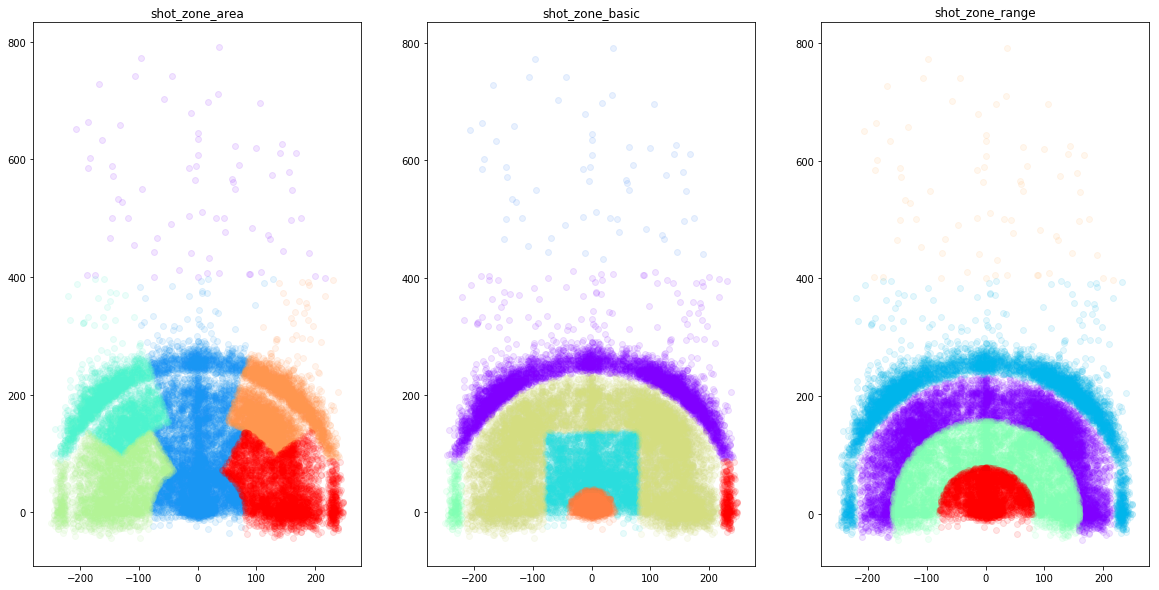

In [83]:
import matplotlib.cm as cm
plt.figure(figsize=(20,10))
#不同位置花不同颜色
def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = kobe.groupby(feat)
    print(gs)
    cs = cm.rainbow(np.linspace(0, 1, len(gs)))
    for g, c in zip(gs, cs):   #每个位置对应一种颜色，引入六个区域，就有六种颜色
        #print(g[1])打包后成为元组，0代表行，1代表列
        plt.scatter(g[1].loc_x, g[1].loc_y, color=c, alpha=alpha)

# shot_zone_area
plt.subplot(131)
scatter_plot_by_category('shot_zone_area')
plt.title('shot_zone_area')

# shot_zone_basic
plt.subplot(132)
scatter_plot_by_category('shot_zone_basic')
plt.title('shot_zone_basic')

# shot_zone_range
plt.subplot(133)
scatter_plot_by_category('shot_zone_range')
plt.title('shot_zone_range')
#三个属性表达同种特性，选用一种即可

In [84]:
drops = ['shot_id', 'team_id', 'team_name', 'shot_zone_area', 'shot_zone_range', 'shot_zone_basic', \
         'matchup', 'lon', 'lat', 'seconds_remaining', 'minutes_remaining', \
         'shot_distance', 'loc_x', 'loc_y', 'game_event_id', 'game_id', 'game_date']
for drop in drops:
    raw = raw.drop(drop, 1)
    #去掉重复的属性

In [92]:
print (raw['combined_shot_type'].value_counts())
pd.get_dummies(raw['combined_shot_type'], prefix='combined_shot_type')[:2]
#独热码对单个属性各分类编码，并用前缀命名

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64


,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
0,0,0,0,1,0,0
1,0,0,0,1,0,0


In [93]:
categorical_vars = ['action_type', 'combined_shot_type', 'shot_type', 'opponent', 'period', 'season']
for var in categorical_vars:
    raw = pd.concat([raw, pd.get_dummies(raw[var], prefix=var)], 1)
    raw = raw.drop(var, 1)